In [7]:
################ Project 1 SDES (AE663) ################

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation, rc
from IPython.display import HTML

# Following code gives the implementation of RK4 ode-solver
* Given the differential equation and initial condition the following code 
    gives numerical solution of the differential equation

In [8]:
################ Implementation of RK4 ################
def rk4(f, x0, t0, t1, n, param = []):
    '''
    Solve the IVP 
        dot(x) = f(x, t, param) 
    Initial conditions:
        x(t0) = x0
    from t0 to t1 (n steps)    
    '''
    import numpy as np
    if type(x0) is list:
        vx = np.array([np.array([float(0)]*len(x0))]*(n+1))
    else:
        vx = np.array([float(0)]*(n+1))   

    time = [0]*(n+1)
    vx[0] = x0
    x = x0
    time[0] = t0
    t = t0
    
    h = (t1 - t0)/float(n)
    for i in range(1,n+1):
        k1 = h*np.array(f(x, t, param))
        k2 = h*np.array(f(x + 0.5*k1, t + 0.5*h, param))
        k3 = h*np.array(f(x + 0.5*k2, t + 0.5*h, param))
        k4 = h*np.array(f(x + k3, t + h, param))
        vx[i] = x + (1.0/6)*(k1 + 2*k2 + 2*k3 + k4)
        time[i] = t0 + i*h 
        t = time[i]
        x = vx[i]
    if type(x0) is list:
        res_vx = [list(k) for k in vx]
    else:
        res_vx = [k for k in vx]
    return res_vx, time

# Plotting the state variables
* Defines all the parameter of the plot (linewidth, marker etc..)

In [9]:
################ Plotting Options ################

def plot(x, y, Title, xTitle, legend, save_option = False, name = None ,show = True):
    '''
    Plots the values with linespecs set 
    '''
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos, = plt.plot(x, y[0], '-ro', lw=1, label=legend[0])
    vel, = plt.plot(x, y[1], '-bx', lw=1, label=legend[1])
    plt.hold('on')
    plt.xlabel(xTitle, family='sans-serif', style='italic',size=10)
    plt.title(Title, family='sans-serif', style='italic',size=10)
    plt.legend(handles=[pos, vel], fontsize=10)
    if(save_option):
        plt.savefig(name + '.png') 
    if(show):
        plt.show()

# Helper functions 
* Change the file parameters.txt or define the values of m, c, k to compute appropriate solution
* force is the forcing function 
* read_parameters reads the parameters from the file parameters.txt
* dynamics is the state-space model of the spring-mass damper system; param[0:2] = [m, c, k], param[3] is the forcing function

In [10]:
################ Mass-spring damper dynamics ################

def read_parameters(path):
    parameters = open(path,'rt')
    parameters = parameters.readlines()
    parameters = parameters[0].rstrip()
    parameters = parameters.split(',')
    parameters = [float(n) for n in parameters]
    return parameters

def dynamics(state, t, param = []):
    m = param[0]
    c = param[1]
    k = param[2]
    force = param[3]
    if force is not None:
        f = force(state,t)
    else:
        f = 0  
    zeta = c/(2*(k*m)**0.5)
    omega_o = (k/m)**0.5
    state_dot = [state[1], -2*zeta*omega_o*state[1] - state[0]*omega_o**2 + f/m]
    return state_dot

def force(state, t):
    return 4*math.sin(0.5*t)    

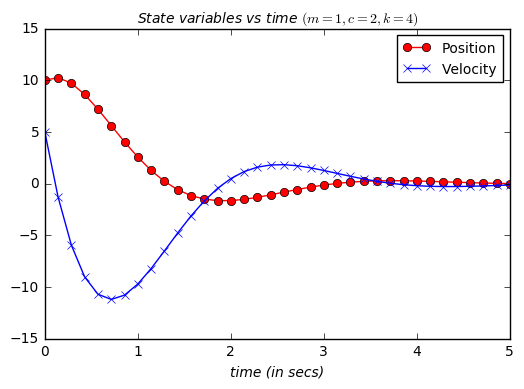

In [11]:
m,c,k = [1, 2, 4]
    
# free response
y, t = rk4(dynamics, [10,5], 0, 5, 35, [m, c, k, None])
plot(t, [[k1[0] for k1 in y],[k1[1] for k1 in y]], r'State variables vs time $(m=1, c=2, k=4)$', \
        'time (in secs)', ['Position', 'Velocity'])


In [12]:
fig, ax = plt.subplots()

a = [k1[0] for k1 in y]
b = [k1[1] for k1 in y]

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

ax.set_xlim(( 0, 5.0))
ax.set_ylim((-15.0, 15.0))
ax.set_xlabel('Time (in secs)')
ax.set_ylabel('State Variable')

line, = ax.plot([], [], lw=2, label='Position')
line1, = ax.plot([], [], lw=2, label='Velocity')
ax.legend()

def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line,)

def animate(i):
    x = t[:i]
    y = a[:i]
    x2 = t[:i]
    y2 = b[:i]
    line.set_data(x, y)
    line1.set_data(x2, y2)
    return (line, line1)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=False)

display_animation(anim)